In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [2]:
PATH = "./chest_xray/"
sz=224
arch=dn121
bs=32

In [3]:
os.listdir(PATH)

['test', 'valid', 'train']

In [4]:
os.listdir(f'{PATH}valid')

['PNEUMONIA', 'NORMAL']

In [5]:
os.makedirs('/cache/tmp', exist_ok=True)
!ln -fs /cache/tmp {PATH}

In [6]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 10/10 [00:14<00:00,  1.46s/it]


epoch      trn_loss   val_loss   accuracy                  
    0      0.169923   0.540709   0.802885  
    1      0.106819   0.580632   0.836538                  
    2      0.087724   0.597104   0.834936                   



[array([0.5971]), 0.8349358989642217]

In [7]:
learn.fit(0.01, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                   
    0      0.08117    0.76379    0.809295  
    1      0.067477   0.636653   0.830128                   
    2      0.062516   0.724711   0.817308                   



[array([0.72471]), 0.8173076938360165]

In [8]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [9]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [10]:
learn.fit(1e-2, 5)

epoch      trn_loss   val_loss   accuracy                    
    0      0.163095   0.69719    0.823718  
    1      0.113325   0.913687   0.798077                    
    2      0.098743   0.766854   0.822115                     
    3      0.078516   0.762339   0.823718                     
    4      0.079943   0.851997   0.815705                     



[array([0.852]), 0.8157051282051282]

In [11]:
learn.precompute=False

In [12]:
learn.fit(1e-2, 1, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.132709   0.602878   0.858974  



[array([0.60288]), 0.8589743589743589]

In [13]:
learn.unfreeze()

In [14]:
lr=np.array([1e-4,1e-3,1e-2])

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.129856   0.381375   0.902244  
    1      0.09638    0.362518   0.913462                     
    2      0.082558   0.423958   0.883013                     
    3      0.078392   0.362333   0.902244                     
    4      0.072574   0.372213   0.907051                     
    5      0.072915   0.380392   0.911859                     
    6      0.054242   0.396733   0.905449                     



[array([0.39673]), 0.905448717948718]

In [16]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [17]:
accuracy_np(probs, y)

0.8701923076923077

## Performance Matrix

In [18]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[156  78]
 [  3 387]]


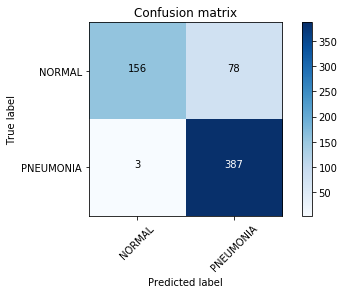

In [20]:
plot_confusion_matrix(cm, data.classes)

In [21]:
# Plot ROC Curve
evaluate.plot_roc_curve(np.array(probs), y)

NameError: name 'evaluate' is not defined

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, _ = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

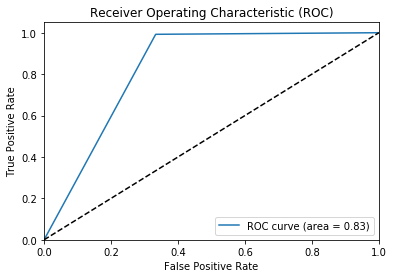

In [24]:
plot_roc(preds,y)